<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Spotting_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import  Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
print(trainData.shape)
print(trainLabel.shape)
print(testData.shape)
print(testLabel.shape)

170500096/170498071 [==============================] - 85s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trainData = trainData.astype('float32')/255
testData = testData.astype('float32')/255

lb = LabelBinarizer()
trainLabel = lb.fit_transform(trainLabel)
testLabel = lb.fit_transform(testLabel)
print(trainLabel.shape)
print(testLabel.shape)


(50000, 10)
(10000, 10)


In [ ]:
model = Sequential([Conv2D(32,(3,3),padding = 'same',input_shape=(32,32,3)),
                    Activation('relu'),
                    Conv2D(32,(3,3,),padding='same'),
                    Activation('relu'),
                    MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    BatchNormalization(axis=-1),                    
                    Dropout(0.5),
                    Conv2D(64,(3,3,),padding='same'),
                    Activation('relu'),
                    # Conv2D(64,(3,3,),padding='same'),
                    # Activation('relu'),
                    BatchNormalization(axis=-1),
                    MaxPool2D(pool_size=(4,4),strides=(2,2)),
                    Dropout(0.5),
                    Flatten(),
                    Dense(10,activation='sigmoid')
                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

In [ ]:
opt = SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
H = model.fit(trainData,trainLabel,batch_size=64,epochs=30,validation_data=(testData,testLabel))

Epoch 1/30
782/782 [==============================] - 6s 6ms/step - loss: 0.1878 - accuracy: 0.9335 - val_loss: 0.9569 - val_accuracy: 0.7913
Epoch 2/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1587 - accuracy: 0.9422 - val_loss: 0.9711 - val_accuracy: 0.7907
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1451 - accuracy: 0.9490 - val_loss: 0.9469 - val_accuracy: 0.7909
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1481 - accuracy: 0.9480 - val_loss: 1.0270 - val_accuracy: 0.7858
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1402 - accuracy: 0.9501 - val_loss: 0.9892 - val_accuracy: 0.7927
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1422 - accuracy: 0.9514 - val_loss: 1.0099 - val_accuracy: 0.7909
Epoch 7/30
782/782 [==============================] - 5s 6ms/step - loss: 0.1274 - accuracy: 0.9539 - val_loss: 1.0237 - val_accuracy: 0.7908
Epoch 

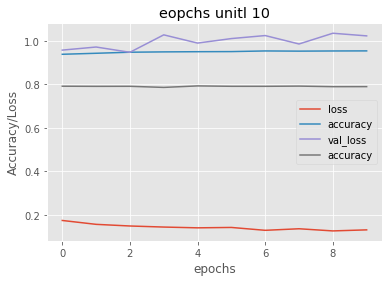

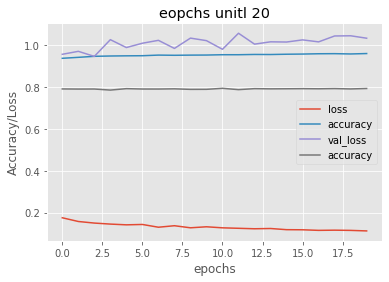

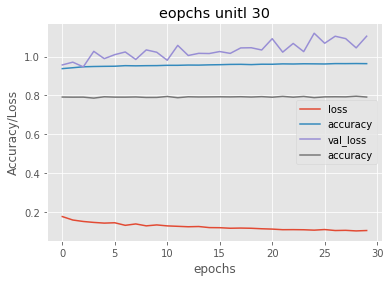

In [ ]:
plt.style.use('ggplot')
for i in (10,20,30):
  fig = plt.figure()
  plt.plot(np.arange(0,i),H.history['loss'][:i],label='loss')
  plt.plot(np.arange(0,i),H.history['accuracy'][:i],label='accuracy')
  plt.plot(np.arange(0,i),H.history['val_loss'][:i],label='val_loss')
  plt.plot(np.arange(0,i),H.history['val_accuracy'][:i],label='accuracy')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy/Loss')
  plt.legend()
  plt.title('eopchs unitl {}'.format(i))
  plt.show()

# The model is clearly overfitting from the about 8th epoch 